In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def calculate_metrics(confusion_matrices):
    precisions = []
    recalls = []
    f1_scores = []
    for confusion_matrix in confusion_matrices:
        tp = confusion_matrix.diagonal()
        fp = confusion_matrix.sum(axis=0) - tp
        fn = confusion_matrix.sum(axis=1) - tp
        tn = confusion_matrix.sum() - (tp + fp + fn)
        
        classwise_precisions = []
        classwise_recalls = []
        classwise_f1_scores = []
        for i in range(len(tp)):
            if(tp[i]+fp[i]==0 or tp[i]+fn[i]==0):
                # print(confusion_matrix,i)
                continue
            p = tp[i]/(tp[i]+fp[i])
            r = tp[i]/(tp[i]+fn[i])
            f1 = 2*p*r/(p+r)
            classwise_precisions.append(p)
            classwise_recalls.append(r)
            classwise_f1_scores.append(f1)
        precision = sum(classwise_precisions)/len(classwise_precisions)
        recall = sum(classwise_recalls)/ len(classwise_recalls)
        f1 = sum(classwise_f1_scores)/ len(classwise_f1_scores)
        
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
    return {
        "f1_scores": f1_scores,
        "precisions": precisions,
        "recalls": recalls
    }

In [3]:
def get_accuracy(history,label = 'val_accuracy'):
    n = len(history)
    accuracy = []
    for i in range(n):
        last_epoch = len(history[i][label])-1
        accuracy.append(history[i][label][last_epoch])
    return accuracy
        

In [4]:
fddlm_history = np.load("./history/fddlm_history.npy",allow_pickle=True)
fddlm_cfs = np.load("./heatmaps/fddlm_cfs.npy")
fddlm_metrics = calculate_metrics(fddlm_cfs)
fddlm_metrics['accuracy'] = get_accuracy(fddlm_history)
fddlm_metrics = pd.DataFrame(fddlm_metrics)
fddlm_metrics

,f1_scores,precisions,recalls,accuracy
0,0.922062,0.929453,0.931143,0.896280
1,0.925253,0.909658,0.952935,0.943630
2,0.855032,0.844675,0.920392,0.846501
3,0.992655,0.992862,0.992450,0.993228
4,0.970432,0.961053,0.981654,0.975169


In [5]:
fddlm_500_history = np.load("./history/fddlm_history_500.npy",allow_pickle=True)
fddlm_500_cfs = np.load("./heatmaps/fddlm_500_cfs.npy")
fddlm_500_metrics = calculate_metrics(fddlm_500_cfs)
fddlm_500_metrics['accuracy'] = get_accuracy(fddlm_500_history)
fddlm_500_metrics = pd.DataFrame(fddlm_500_metrics)
fddlm_500_metrics

,f1_scores,precisions,recalls,accuracy
0,0.993971,0.991797,0.996251,0.995490
1,0.989023,0.988636,0.989498,0.989853
2,0.983022,0.978221,0.988084,0.984199
3,0.995946,0.994912,0.997015,0.996614
4,1.000000,1.000000,1.000000,1.000000


In [6]:
cnn_history = np.load("./history/cnn_history.npy",allow_pickle=True)
cnn_cfs = np.load("./heatmaps/cnn_cfs.npy")
cnn_metrics = calculate_metrics(cnn_cfs)
cnn_metrics['accuracy'] = get_accuracy(cnn_history,label='val_acc')
cnn_metrics = pd.DataFrame(cnn_metrics)
cnn_metrics

,f1_scores,precisions,recalls,accuracy
0,0.494058,1.000000,0.328072,0.328072
1,0.779669,0.852851,0.754914,0.763247
2,0.771058,0.831980,0.760486,0.774266
3,0.705665,0.728606,0.745230,0.757336
4,0.667733,0.729730,0.686709,0.783296


In [7]:
cnn_lstm_history = np.load("./history/cnn_lstm_history.npy",allow_pickle=True)
cnn_lstm_cfs = np.load("./heatmaps/cnn_lstm_cfs.npy")
cnn_lstm_metrics = calculate_metrics(cnn_lstm_cfs)
cnn_lstm_metrics['accuracy'] = get_accuracy(cnn_lstm_history,label='val_acc')
cnn_lstm_metrics = pd.DataFrame(cnn_lstm_metrics)
cnn_lstm_metrics

,f1_scores,precisions,recalls,accuracy
0,0.742701,0.722303,0.800412,0.797069
1,0.709184,0.706490,0.773627,0.762120
2,0.708138,0.696401,0.742825,0.765237
3,0.760285,0.761627,0.802880,0.785553
4,0.747555,0.757614,0.747290,0.790068


In [8]:
fddlm_500_metrics.describe()

,f1_scores,precisions,recalls,accuracy
count,5.000000,5.000000,5.000000,5.000000
mean,0.992392,0.990713,0.994169,0.993231
std,0.006560,0.008146,0.005130,0.006232
min,0.983022,0.978221,0.988084,0.984199
25%,0.989023,0.988636,0.989498,0.989853
50%,0.993971,0.991797,0.996251,0.995490
75%,0.995946,0.994912,0.997015,0.996614
max,1.000000,1.000000,1.000000,1.000000


In [9]:
cnn_lstm_metrics.describe()

,f1_scores,precisions,recalls,accuracy
count,5.000000,5.000000,5.000000,5.000000
mean,0.733572,0.728887,0.773407,0.780009
std,0.023633,0.029570,0.028352,0.015502
min,0.708138,0.696401,0.742825,0.762120
25%,0.709184,0.706490,0.747290,0.765237
50%,0.742701,0.722303,0.773627,0.785553
75%,0.747555,0.757614,0.800412,0.790068
max,0.760285,0.761627,0.802880,0.797069


In [10]:
cnn_metrics.describe()

,f1_scores,precisions,recalls,accuracy
count,5.000000,5.000000,5.000000,5.000000
mean,0.683636,0.828633,0.655082,0.681243
std,0.115697,0.111525,0.185161,0.197682
min,0.494058,0.728606,0.328072,0.328072
25%,0.667733,0.729730,0.686709,0.757336
50%,0.705665,0.831980,0.745230,0.763247
75%,0.771058,0.852851,0.754914,0.774266
max,0.779669,1.000000,0.760486,0.783296


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_confusion_matrices(n, m, confusion_matrices):
    sns.set_style("whitegrid")
    fig, axes = plt.subplots(n, m, figsize=(5*m, 4*n))
    for i, ax in enumerate(axes.flat):
        if i < len(confusion_matrices):
            sns.heatmap(confusion_matrices[i], cmap='Blues', ax=ax, annot=True,  fmt='d', cbar=False, linecolor='gray', linewidths=0.5)
            ax.text(0.5, -0.15, f"({chr(97 + i)})", size=12, ha="center", transform=ax.transAxes)
    plt.suptitle("K-fold Validation (COPD Dataset)", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('K fold COPD.png')
    plt.show()

In [2]:
import numpy as np

In [4]:
cnn_cfs = np.load('./heatmaps/cnn_cfs.npy')
cnn_lstm_cfs = np.load('./heatmaps/cnn_lstm_cfs.npy')
fddlm_cfs = np.load('./heatmaps/fddlm_500_cfs.npy')

In [7]:
sup_cfs = np.concatenate((cnn_cfs, cnn_lstm_cfs, fddlm_cfs),axis=0)

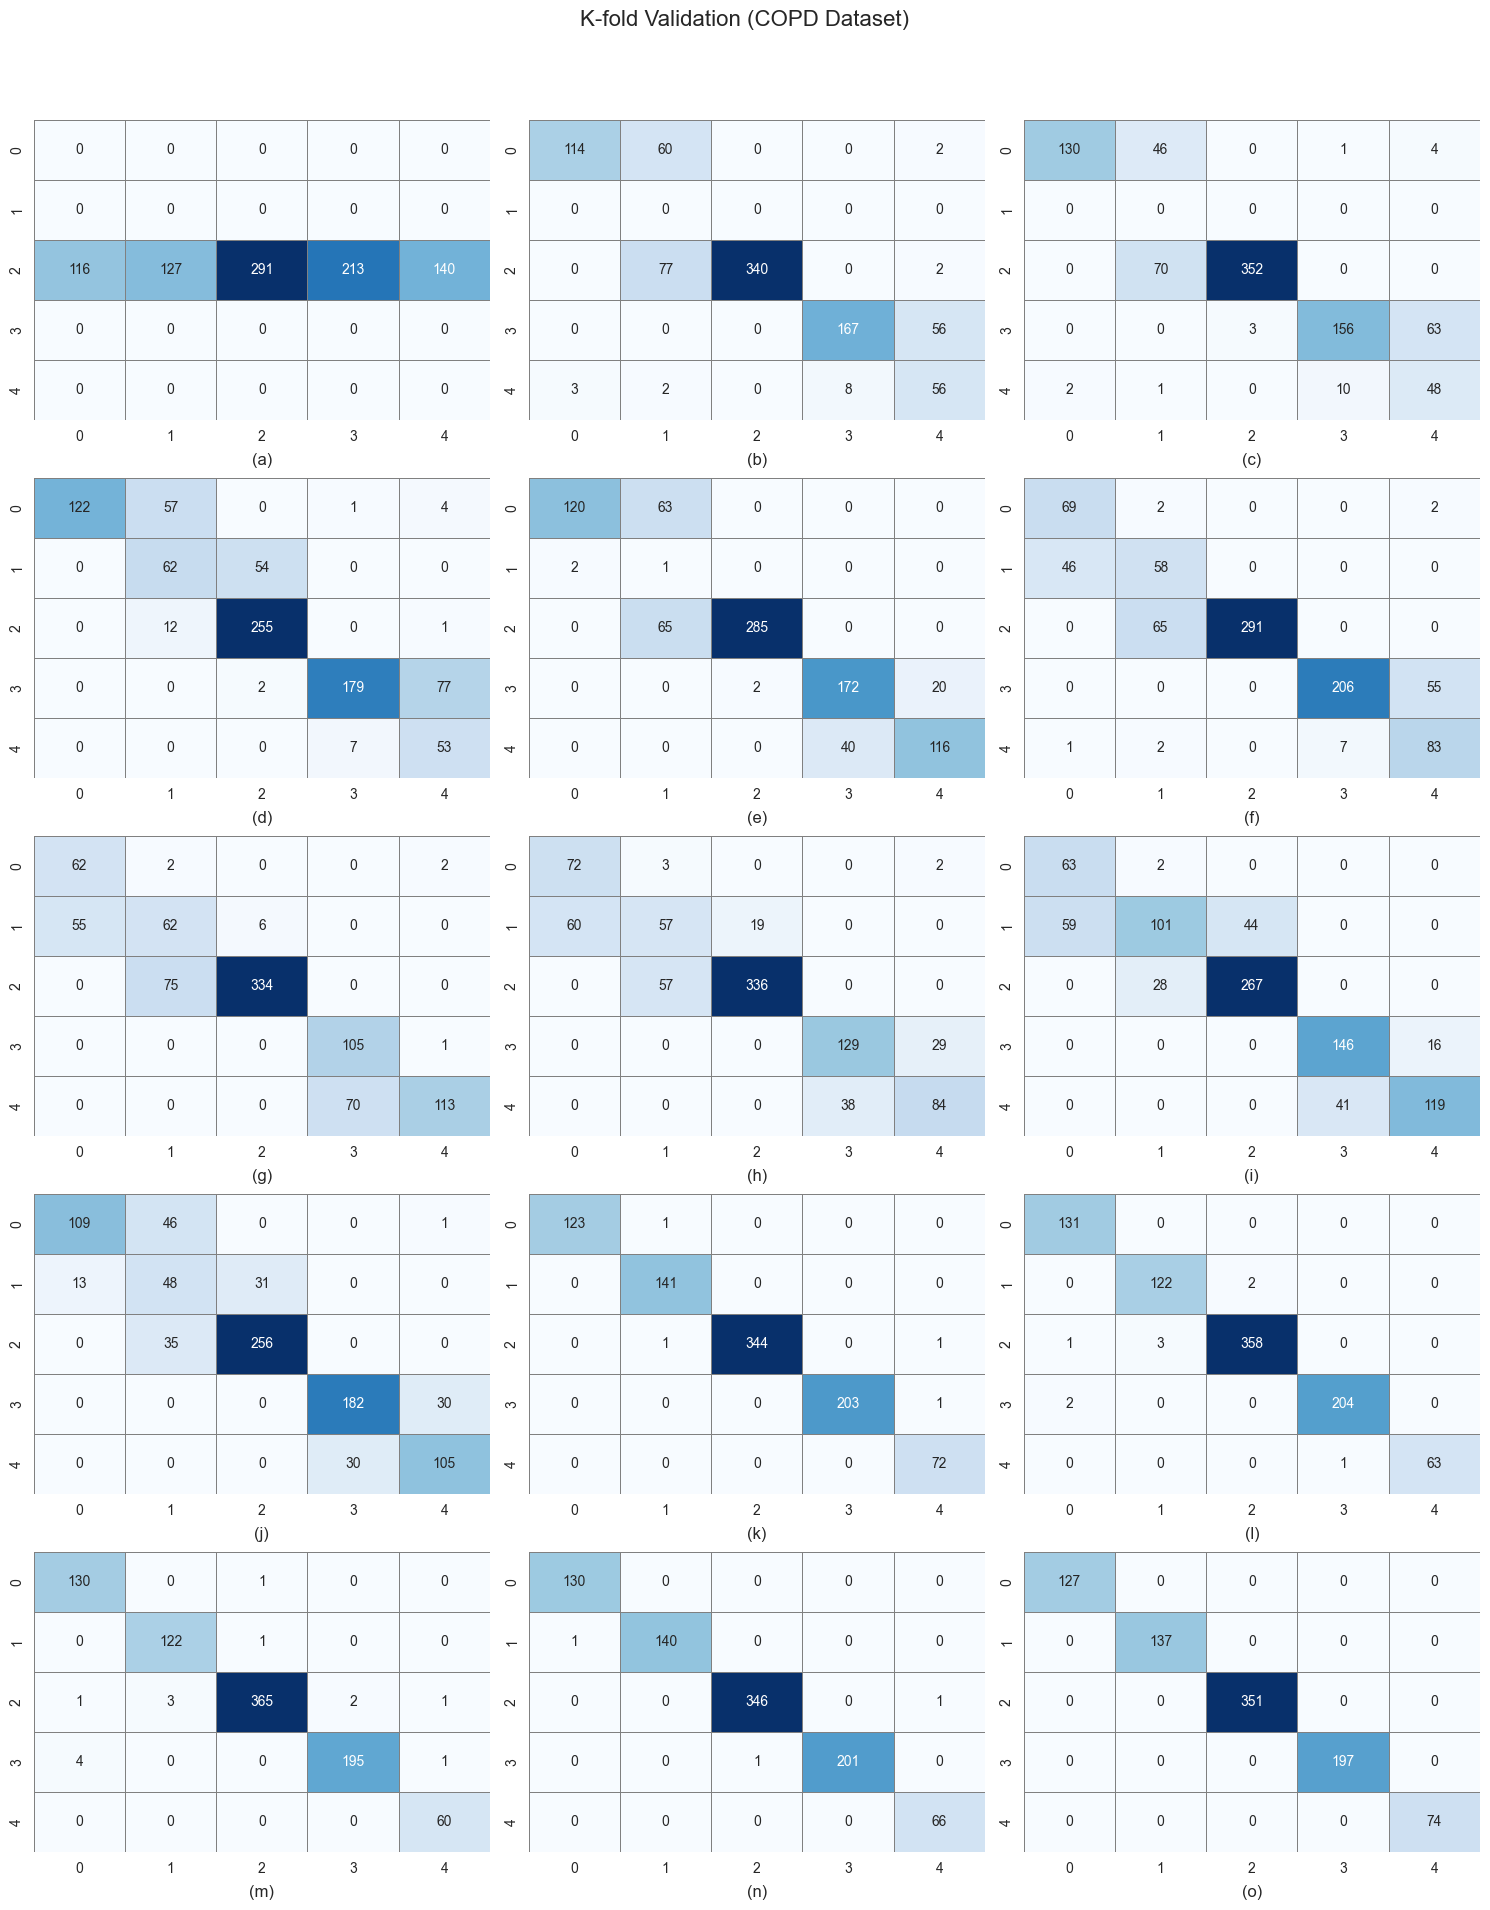

In [31]:
plot_confusion_matrices(5,3,sup_cfs)